In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# GroupBy operation
world_cup={'Team':['West Indies','West Indies','India','Australia','Pakistan','Sri Lanka','Australia','Australia','Australia','India','Australia'],
           'Rank':[7,7,2,1,6,4,1,1,1,2,1],
           'Year':[1975,1979,1983,1987,1992,1996,1999,2003,2007,2011,2015]}
df=pd.DataFrame(world_cup)
df

,Team,Rank,Year
0,West Indies,7,1975
1,West Indies,7,1979
2,India,2,1983
3,Australia,1,1987
4,Pakistan,6,1992
5,Sri Lanka,4,1996
6,Australia,1,1999
7,Australia,1,2003
8,Australia,1,2007
9,India,2,2011


In [5]:
df.groupby('Team').groups

{'Australia': Int64Index([3, 6, 7, 8, 10], dtype='int64'),
 'India': Int64Index([2, 9], dtype='int64'),
 'Pakistan': Int64Index([4], dtype='int64'),
 'Sri Lanka': Int64Index([5], dtype='int64'),
 'West Indies': Int64Index([0, 1], dtype='int64')}

In [7]:
df.groupby(['Team', 'Rank']).groups

{('Australia', 1): Int64Index([3, 6, 7, 8, 10], dtype='int64'),
 ('India', 2): Int64Index([2, 9], dtype='int64'),
 ('Pakistan', 6): Int64Index([4], dtype='int64'),
 ('Sri Lanka', 4): Int64Index([5], dtype='int64'),
 ('West Indies', 7): Int64Index([0, 1], dtype='int64')}

In [8]:
df.groupby('Team')

In [11]:
for name, group in df.groupby('Team'):
    #print(name, group)
    print(name)

Australia
India
Pakistan
Sri Lanka
West Indies


In [12]:
group_obj = df.groupby('Team')
group_obj.get_group('India')

,Team,Rank,Year
2,India,2,1983
9,India,2,2011


### Aggregations

In [15]:
data = {'odd':np.arange(1,100,2), 'even':np.arange(0,100,2)}
df = pd.DataFrame(data)
df.head()

,odd,even
0,1,0
1,3,2
2,5,4
3,7,6
4,9,8


In [16]:
df.groupby('odd').groups

{1: Int64Index([0], dtype='int64'),
 3: Int64Index([1], dtype='int64'),
 5: Int64Index([2], dtype='int64'),
 7: Int64Index([3], dtype='int64'),
 9: Int64Index([4], dtype='int64'),
 11: Int64Index([5], dtype='int64'),
 13: Int64Index([6], dtype='int64'),
 15: Int64Index([7], dtype='int64'),
 17: Int64Index([8], dtype='int64'),
 19: Int64Index([9], dtype='int64'),
 21: Int64Index([10], dtype='int64'),
 23: Int64Index([11], dtype='int64'),
 25: Int64Index([12], dtype='int64'),
 27: Int64Index([13], dtype='int64'),
 29: Int64Index([14], dtype='int64'),
 31: Int64Index([15], dtype='int64'),
 33: Int64Index([16], dtype='int64'),
 35: Int64Index([17], dtype='int64'),
 37: Int64Index([18], dtype='int64'),
 39: Int64Index([19], dtype='int64'),
 41: Int64Index([20], dtype='int64'),
 43: Int64Index([21], dtype='int64'),
 45: Int64Index([22], dtype='int64'),
 47: Int64Index([23], dtype='int64'),
 49: Int64Index([24], dtype='int64'),
 51: Int64Index([25], dtype='int64'),
 53: Int64Index([26], dtype

In [18]:
df['odd'].head()

0    1
1    3
2    5
3    7
4    9
Name: odd, dtype: int64

## concatenation

In [19]:
world_champions={'Team':['India','Australia','West Indies','Pakistan','Sri Lanka'],
           'ICC_rank':[2,3,7,8,4],
           'World_champions_Year':[2011,2015,1979,1992,1996],
           'Points':[874,787,753,673,855]}

chokers={'Team':['South Africa','New Zealand','Zimbabwe'],
           'ICC_rank':[1,5,9],
           'Points':[895,764,656]}
df1 = pd.DataFrame(world_champions)
df2 = pd.DataFrame(chokers)
print("DF1: World champions")
print(df1)
print("#"*20)
print("DF2: Chokers")
print(df2)

DF1: World champions
          Team  ICC_rank  World_champions_Year  Points
0        India         2                  2011     874
1    Australia         3                  2015     787
2  West Indies         7                  1979     753
3     Pakistan         8                  1992     673
4    Sri Lanka         4                  1996     855
####################
DF2: Chokers
           Team  ICC_rank  Points
0  South Africa         1     895
1   New Zealand         5     764
2      Zimbabwe         9     656


In [31]:
combined = pd.concat([df1,df2],sort=False)
combined

,Team,ICC_rank,World_champions_Year,Points
0,India,2,2011.0,874
1,Australia,3,2015.0,787
2,West Indies,7,1979.0,753
3,Pakistan,8,1992.0,673
4,Sri Lanka,4,1996.0,855
0,South Africa,1,NaN,895
1,New Zealand,5,NaN,764
2,Zimbabwe,9,NaN,656


In [33]:
combined.iloc[6]

Team                    New Zealand
ICC_rank                          5
World_champions_Year            NaN
Points                          764
Name: 1, dtype: object

In [36]:
df1.append(df2, sort=False)

,Team,ICC_rank,World_champions_Year,Points
0,India,2,2011.0,874
1,Australia,3,2015.0,787
2,West Indies,7,1979.0,753
3,Pakistan,8,1992.0,673
4,Sri Lanka,4,1996.0,855
0,South Africa,1,NaN,895
1,New Zealand,5,NaN,764
2,Zimbabwe,9,NaN,656


In [37]:
pd.concat([df1,df2],axis=1,sort=False)

,Team,ICC_rank,World_champions_Year,Points,Team,ICC_rank,Points
0,India,2,2011,874,South Africa,1.0,895.0
1,Australia,3,2015,787,New Zealand,5.0,764.0
2,West Indies,7,1979,753,Zimbabwe,9.0,656.0
3,Pakistan,8,1992,673,NaN,NaN,NaN
4,Sri Lanka,4,1996,855,NaN,NaN,NaN


## merging and joining

In [39]:

champion_stats={'Team':['India','Australia','West Indies','Pakistan','Sri Lanka'],
           'ICC_rank':[2,3,7,8,4],
           'World_champions_Year':[2011,2015,1979,1992,1996],
           'Points':[874,787,753,673,855]}

match_stats={'Team':['India','Australia','West Indies','Pakistan','Sri Lanka'],
             'World_cup_played':[11,10,11,9,8],
             'ODIs_played':[733,988,712,679,662]}


df1=pd.DataFrame(champion_stats)
df2=pd.DataFrame(match_stats)
df1

,Team,ICC_rank,World_champions_Year,Points
0,India,2,2011,874
1,Australia,3,2015,787
2,West Indies,7,1979,753
3,Pakistan,8,1992,673
4,Sri Lanka,4,1996,855


In [40]:
df2

,Team,World_cup_played,ODIs_played
0,India,11,733
1,Australia,10,988
2,West Indies,11,712
3,Pakistan,9,679
4,Sri Lanka,8,662


In [41]:
pd.merge(df1, df2, on='Team')

,Team,ICC_rank,World_champions_Year,Points,World_cup_played,ODIs_played
0,India,2,2011,874,11,733
1,Australia,3,2015,787,10,988
2,West Indies,7,1979,753,11,712
3,Pakistan,8,1992,673,9,679
4,Sri Lanka,4,1996,855,8,662


In [42]:
# inner join
pd.merge(df1, df2, on='Team', how='inner')

,Team,ICC_rank,World_champions_Year,Points,World_cup_played,ODIs_played
0,India,2,2011,874,11,733
1,Australia,3,2015,787,10,988
2,West Indies,7,1979,753,11,712
3,Pakistan,8,1992,673,9,679
4,Sri Lanka,4,1996,855,8,662


In [43]:
# left join
pd.merge(df1, df2, on='Team', how='left')

,Team,ICC_rank,World_champions_Year,Points,World_cup_played,ODIs_played
0,India,2,2011,874,11,733
1,Australia,3,2015,787,10,988
2,West Indies,7,1979,753,11,712
3,Pakistan,8,1992,673,9,679
4,Sri Lanka,4,1996,855,8,662


In [44]:
# left join
champion_stats={'Team':['India','Australia','West Indies','Pakistan','Sri Lanka'],
           'ICC_rank':[2,3,7,8,4],
           'World_champions_Year':[2011,2015,1979,1992,1996],
           'Points':[874,787,753,673,855]}
chokers={'Team':['South Africa','New Zealand','Zimbabwe'],
           'ICC_rank':[1,5,9],
           'Points':[895,764,656]}
df1=pd.DataFrame(champion_stats)
df2=pd.DataFrame(chokers)
df1

,Team,ICC_rank,World_champions_Year,Points
0,India,2,2011,874
1,Australia,3,2015,787
2,West Indies,7,1979,753
3,Pakistan,8,1992,673
4,Sri Lanka,4,1996,855


In [45]:
df2

,Team,ICC_rank,Points
0,South Africa,1,895
1,New Zealand,5,764
2,Zimbabwe,9,656


In [46]:
pd.merge(df1, df2, on='Team', how='left')

,Team,ICC_rank_x,World_champions_Year,Points_x,ICC_rank_y,Points_y
0,India,2,2011,874,NaN,NaN
1,Australia,3,2015,787,NaN,NaN
2,West Indies,7,1979,753,NaN,NaN
3,Pakistan,8,1992,673,NaN,NaN
4,Sri Lanka,4,1996,855,NaN,NaN


In [47]:
# right join
pd.merge(df1, df2, on='Team', how='right')

,Team,ICC_rank_x,World_champions_Year,Points_x,ICC_rank_y,Points_y
0,South Africa,NaN,NaN,NaN,1,895
1,New Zealand,NaN,NaN,NaN,5,764
2,Zimbabwe,NaN,NaN,NaN,9,656


In [48]:
# outer join
pd.merge(df1, df2, on='Team', how='outer')

,Team,ICC_rank_x,World_champions_Year,Points_x,ICC_rank_y,Points_y
0,India,2.0,2011.0,874.0,NaN,NaN
1,Australia,3.0,2015.0,787.0,NaN,NaN
2,West Indies,7.0,1979.0,753.0,NaN,NaN
3,Pakistan,8.0,1992.0,673.0,NaN,NaN
4,Sri Lanka,4.0,1996.0,855.0,NaN,NaN
5,South Africa,NaN,NaN,NaN,1.0,895.0
6,New Zealand,NaN,NaN,NaN,5.0,764.0
7,Zimbabwe,NaN,NaN,NaN,9.0,656.0


# Data analysis problem

In [49]:
import pandas as pd
data = pd.read_csv(r'/Users/gyanendra/Desktop/PyDataScience_venv/Module5/gyan/AllCountries.csv')
data.head()

,Country,LandArea,Population,GDP,Rural,Internet,BirthRate,DeathRate,ElderlyPop,LifeExpectancy,FemaleLabor,Unemployment
0,Afghanistan,652.86,30.552,665.0,74.1,5.9,34.1,7.8,2.3,60.9,16.2,NaN
1,Albania,27.40,2.897,4460.0,44.6,60.1,12.9,6.9,10.7,77.5,51.7,13.4
2,Algeria,2381.74,39.208,5361.0,30.5,16.5,24.3,5.9,4.6,71.0,16.2,11.0
3,American Samoa,0.20,0.055,NaN,12.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,0.47,0.079,NaN,13.8,94.0,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data.describe()

,LandArea,Population,GDP,Rural,Internet,BirthRate,DeathRate,ElderlyPop,LifeExpectancy,FemaleLabor,Unemployment
count,215.000000,215.000000,186.000000,215.000000,203.000000,202.000000,203.000000,195.000000,199.000000,186.000000,108.000000
mean,604.660335,33.042014,14333.672043,41.228372,43.024138,21.250990,8.072906,7.976923,70.841709,58.076882,9.687963
std,1759.001021,130.424120,20501.708730,24.478096,29.258941,10.513622,3.133041,5.512164,9.096521,17.079121,6.681859
min,0.002000,0.010000,226.000000,0.000000,0.900000,7.900000,1.000000,0.400000,45.600000,14.300000,0.200000
25%,10.858500,0.836500,1846.500000,21.550000,15.350000,12.225000,5.950000,3.400000,65.300000,49.725000,5.175000
50%,94.280000,6.202000,5736.000000,41.600000,43.500000,19.350000,7.500000,5.500000,73.800000,60.350000,7.800000
75%,440.310000,21.863000,16072.500000,61.200000,66.600000,27.500000,9.700000,12.300000,77.250000,70.175000,13.400000
max,16376.870000,1357.380000,110665.000000,91.300000,96.500000,49.700000,17.200000,25.100000,83.800000,89.900000,31.000000


In [52]:
data.dtypes

Country            object
LandArea          float64
Population        float64
GDP               float64
Rural             float64
Internet          float64
BirthRate         float64
DeathRate         float64
ElderlyPop        float64
LifeExpectancy    float64
FemaleLabor       float64
Unemployment      float64
dtype: object

In [54]:
# 1: find countries with a size greater then 2000sqkm
# let's extract columns we need
selected_data = data.loc[:,['Country', 'LandArea']]
selected_data.head()

,Country,LandArea
0,Afghanistan,652.86
1,Albania,27.40
2,Algeria,2381.74
3,American Samoa,0.20
4,Andorra,0.47


In [57]:
selected_data[selected_data['LandArea'] > 2000]

,Country,LandArea
2,Algeria,2381.740
7,Argentina,2736.690
10,Australia,7682.300
26,Brazil,8358.140
34,Canada,9093.510
40,China,9388.211
43,"Congo, Dem. Rep.",2267.050
86,India,2973.190
97,Kazakhstan,2699.700
158,Russian Federation,16376.870


In [60]:
selected_data[selected_data['LandArea'] < 100]

,Country,LandArea
1,Albania,27.400
3,American Samoa,0.200
4,Andorra,0.470
6,Antigua and Barbuda,0.440
8,Armenia,28.470
9,Aruba,0.180
11,Austria,82.409
12,Azerbaijan,82.658
13,"Bahamas, The",10.010
14,Bahrain,0.760


In [65]:
# multiple conditions together.
# and '&'
selected_data[(selected_data['LandArea'] < 3000) & (selected_data['LandArea']>2000)]

,Country,LandArea
2,Algeria,2381.74
7,Argentina,2736.69
43,"Congo, Dem. Rep.",2267.05
86,India,2973.19
97,Kazakhstan,2699.70
163,Saudi Arabia,2149.69
182,Sudan,2376.00


In [67]:
# multiple conditions together.
# and '|'
selected_data[(selected_data['LandArea'] < 1000) | (selected_data['LandArea']>2000)]

,Country,LandArea
0,Afghanistan,652.860
1,Albania,27.400
2,Algeria,2381.740
3,American Samoa,0.200
4,Andorra,0.470
6,Antigua and Barbuda,0.440
7,Argentina,2736.690
8,Armenia,28.470
9,Aruba,0.180
10,Australia,7682.300


In [69]:
for elem in selected_data.itertuples():  # named tuple
    if elem.LandArea > 2000:
        print(elem.Country)

Algeria
Argentina
Australia
Brazil
Canada
China
Congo, Dem. Rep.
India
Kazakhstan
Russian Federation
Saudi Arabia
Sudan
United States


Text(0,0.5,'BirthRate')

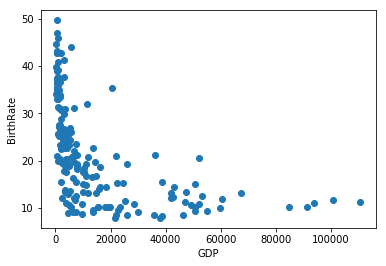

In [75]:
# 2: is there any relationship between GDP per capita of countries and their
#... birth rate
selected_data = data[['Country', 'GDP', 'BirthRate']]
#selected_data = data.loc[:,['Country', 'GDP', 'BirthRate']]
plt.scatter(selected_data['GDP'], selected_data['BirthRate'])
plt.xlabel('GDP')
plt.ylabel('BirthRate')

(0, 20000)

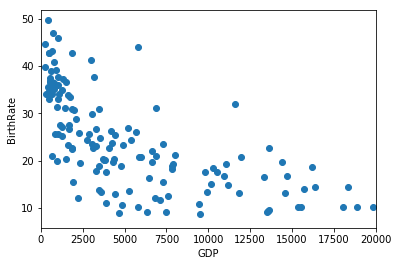

In [76]:
plt.scatter(selected_data['GDP'], selected_data['BirthRate'])
plt.xlabel('GDP')
plt.ylabel('BirthRate')
plt.xlim(0,20000)

In [82]:
# 3. get 10 highest GDP countries

selected_data = data.loc[:,['Country', 'GDP', 'BirthRate']]
sorted_data = selected_data.sort_values(by='GDP', ascending=False)
#sorted_data[:10]
sorted_data = sorted_data.iloc[:10]
sorted_data

,Country,GDP,BirthRate
113,Luxembourg,110665.0,11.3
143,Norway,100898.0,11.6
156,Qatar,93714.0,11.0
114,"Macao SAR, China",91376.0,10.2
186,Switzerland,84748.0,10.2
10,Australia,67463.0,13.2
185,Sweden,60381.0,11.8
52,Denmark,59819.0,10.0
168,Singapore,55182.0,9.3
204,United States,53042.0,12.5


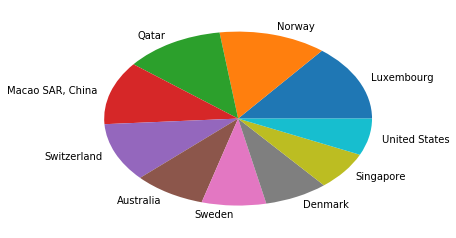

In [83]:
plt.pie(sorted_data['GDP'], labels=sorted_data['Country'])
plt.show()

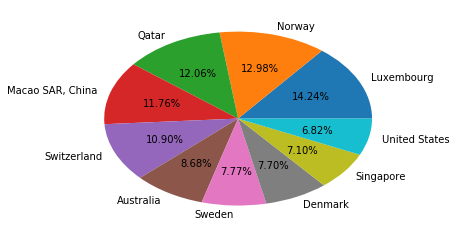

In [85]:
# show percentage
plt.pie(sorted_data['GDP'], labels=sorted_data['Country'], autopct="%1.2f%%")
plt.show()

In [90]:
# ignoring the case of column names
# sol: update the column names to lower case
import pandas as pd
data = pd.read_csv(r'/Users/gyanendra/Desktop/PyDataScience_venv/Module5/gyan/AllCountries.csv')
data.columns = data.columns.str.lower()
data.columns

Index(['country', 'landarea', 'population', 'gdp', 'rural', 'internet',
       'birthrate', 'deathrate', 'elderlypop', 'lifeexpectancy', 'femalelabor',
       'unemployment'],
      dtype='object')